AMV Historical Data

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [3]:
df

0       15225.0
1       14865.0
2       14414.0
3       14594.0
4       14144.0
         ...   
1308     3500.0
1309     3500.0
1310     3500.0
1311     3600.0
1312     3700.0
Name: Price, Length: 1313, dtype: float64

In [4]:
# 3. Split train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [8]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [9]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [10]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[3610.11035507 3598.76755092 3587.42474677 3576.08194262 3564.73913846
 3553.39633431 3542.05353016 3530.71072601 3519.36792186 3508.02511771
 3496.68231355 3485.3395094  3473.99670525 3462.6539011  3451.31109695
 3439.9682928  3428.62548865 3417.28268449 3405.93988034 3394.59707619
 3383.25427204 3371.91146789 3360.56866374 3349.22585958 3337.88305543
 3326.54025128 3315.19744713 3303.85464298 3292.51183883 3281.16903467]
Predicted closing prices for the next 60 days:
[3610.11035507 3598.76755092 3587.42474677 3576.08194262 3564.73913846
 3553.39633431 3542.05353016 3530.71072601 3519.36792186 3508.02511771
 3496.68231355 3485.3395094  3473.99670525 3462.6539011  3451.31109695
 3439.9682928  3428.62548865 3417.28268449 3405.93988034 3394.59707619
 3383.25427204 3371.91146789 3360.56866374 3349.22585958 3337.88305543
 3326.54025128 3315.19744713 3303.85464298 3292.51183883 3281.16903467
 3269.82623052 3258.48342637 3247.14062222 3235.79781

In [11]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 1061.3632561887218
MAPE: 22.74161150521973
MSLE: 0.04892774926843576


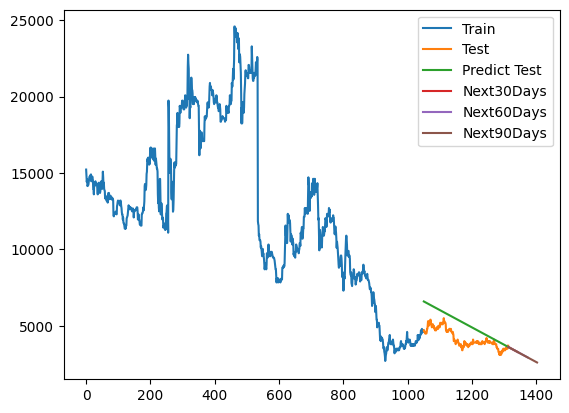

In [12]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DHT Historical Data

In [13]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [14]:
# 2. Load data
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [15]:
df

0       10860.1
1       11224.9
2       11337.1
3       11561.6
4       11589.7
         ...   
1307    38600.0
1308    39300.0
1309    39500.0
1310    39300.0
1311    40400.0
Name: Price, Length: 1312, dtype: float64

In [16]:
# 3. Split train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [17]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [19]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [20]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [21]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [22]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[15703.92708208 15704.61075617 15705.29443027 15705.97810436
 15706.66177845 15707.34545255 15708.02912664 15708.71280073
 15709.39647482 15710.08014892 15710.76382301 15711.4474971
 15712.13117119 15712.81484529 15713.49851938 15714.18219347
 15714.86586756 15715.54954166 15716.23321575 15716.91688984
 15717.60056394 15718.28423803 15718.96791212 15719.65158621
 15720.33526031 15721.0189344  15721.70260849 15722.38628258
 15723.06995668 15723.75363077]
Predicted closing prices for the next 60 days:
[15703.92708208 15704.61075617 15705.29443027 15705.97810436
 15706.66177845 15707.34545255 15708.02912664 15708.71280073
 15709.39647482 15710.08014892 15710.76382301 15711.4474971
 15712.13117119 15712.81484529 15713.49851938 15714.18219347
 15714.86586756 15715.54954166 15716.23321575 15716.91688984
 15717.60056394 15718.28423803 15718.96791212 15719.65158621
 15720.33526031 15721.0189344  15721.70260849 15722.38628258
 15723.06995668 15723.

In [23]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 10053.829953851624
MAPE: 34.99483542157888
MSLE: 0.22572886542387186


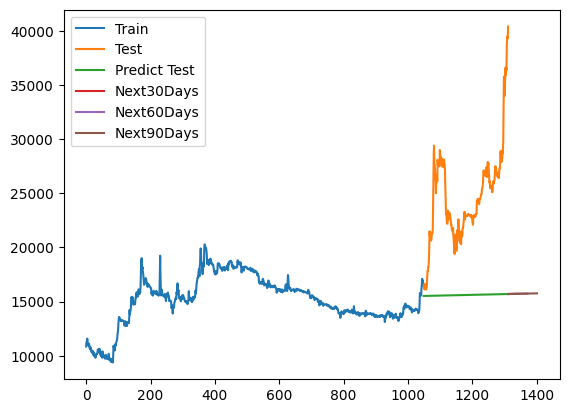

In [24]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DP3 Historical Data

In [25]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [26]:
# 2. Load data
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [27]:
df

0       73800.0
1       74900.0
2       74400.0
3       74700.0
4       76300.0
         ...   
1132    60900.0
1133    61000.0
1134    61000.0
1135    61500.0
1136    61600.0
Name: Price, Length: 1137, dtype: float64

In [28]:
# 3. Split train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [29]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [31]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [32]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [33]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [34]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[62721.68441048 62702.23845702 62682.79250355 62663.34655009
 62643.90059662 62624.45464316 62605.00868969 62585.56273623
 62566.11678276 62546.6708293  62527.22487583 62507.77892237
 62488.3329689  62468.88701544 62449.44106197 62429.99510851
 62410.54915504 62391.10320158 62371.65724811 62352.21129465
 62332.76534118 62313.31938772 62293.87343425 62274.42748079
 62254.98152732 62235.53557386 62216.08962039 62196.64366693
 62177.19771346 62157.75176   ]
Predicted closing prices for the next 60 days:
[62721.68441048 62702.23845702 62682.79250355 62663.34655009
 62643.90059662 62624.45464316 62605.00868969 62585.56273623
 62566.11678276 62546.6708293  62527.22487583 62507.77892237
 62488.3329689  62468.88701544 62449.44106197 62429.99510851
 62410.54915504 62391.10320158 62371.65724811 62352.21129465
 62332.76534118 62313.31938772 62293.87343425 62274.42748079
 62254.98152732 62235.53557386 62216.08962039 62196.64366693
 62177.19771346 6215

In [35]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 4983.371734712466
MAPE: 6.78216421523005
MSLE: 0.0060186713674169395


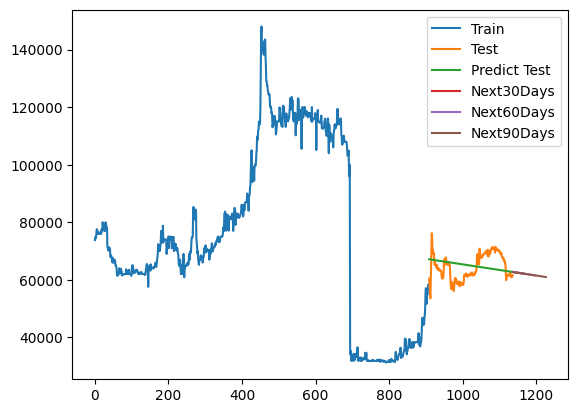

In [36]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()